**Author : Isha Patil**

In this notebook I have implemented and compared 2 clustering algorithms- i) K-Means ii) DBSCAN <br>
to find our locations of interest (hotspots)

~ The algorithms are run on 10,000 data points <br>
    -Reason: The current processing and computing power would not scale for the entire dataset <br>
  
~ **Silhouette Score** is the factor used for comparing the performance of the 2 algorithms <br>
    -Reason: _Silhouette score is the ratio of intra-cluster distance vs inter-cluster distance_ <br>
       This score will effectively help me understand how clearly and concisely the datapoints are clustered, which
       is a critical part of my implementation. <br>
      
Based on the silhouette score, the better algorithm is picked for further implementation on the entire dataset

In [6]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import datetime
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler as scalar
 
file = '../pre_processing11/levelB1_coordinates_only.csv'
df = pd.read_csv(file, nrows=10000)

In [7]:
#Checking the data types of latitude and longitude columns
df.dtypes

lat    float64
lng    float64
dtype: object

In [3]:
list(df)

['Level', 'ClientMacAddr', 'lat', 'lng', 'just_time', 'just_date']

In [4]:
# finding total number of unique spots
df.groupby(['lat', 'lng']).ngroups

3090

In [5]:
# verifying the above
len(set(zip(df['lat'],df['lng'])))

3090

In [6]:
# lat long unique pairs with frequency count 
df_unique=df.groupby(['lat', 'lng']).size()
df_unique

lat       lng       
1.290275  103.851630       5
1.290284  103.851622       1
1.290286  103.851630       1
1.290293  103.851624       1
1.290303  103.851634       1
1.290432  103.851640       1
1.290465  103.851481       1
1.290467  103.851480       1
1.290468  103.851478       1
1.290469  103.851478       1
1.290471  103.851476       1
1.290473  103.851475       1
          103.851474     195
          103.851474       1
          103.851475       1
          103.851474       1
1.290474  103.851474       1
          103.851475       1
          103.851475       1
          103.851475       1
          103.851475       2
          103.851475       1
          103.851475       1
          103.851475       1
1.290475  103.851475       1
          103.851475       1
          103.851475       1
          103.851475       1
          103.851475       1
          103.851476       2
                        ... 
1.290866  103.851724       1
          103.851724      17
          103.851724  

In [7]:
df_unique.dtypes

dtype('int64')

In [8]:
df_unique.head()

lat       lng       
1.290275  103.851630    5
1.290284  103.851622    1
1.290286  103.851630    1
1.290293  103.851624    1
1.290303  103.851634    1
dtype: int64

In [9]:
type(df_unique)

pandas.core.series.Series

In [10]:
df.dtypes

Level             object
ClientMacAddr      int64
lat              float64
lng              float64
just_time         object
just_date         object
dtype: object

In [18]:
#Converting the data type of just_date to datetime64
df['just_date'] = pd.to_datetime(df['just_date'])

In [20]:
#Converting dates to days of the week
df['days'] = df['just_date'].dt.dayofweek

In [21]:
#Counting the number of observations for every day of the week
df.groupby(df['days']).size()

days
0     844
1    2370
2    1230
3    1129
4    1496
5     481
6    2450
dtype: int64

In [23]:
#Making separate day wise dataframes to check variations iin clusters based on days of the week.
df_Mon=df.loc[df['days']==0]
df_Tue=df.loc[df['days']==1]

In [24]:
# This is the dataframe containing all the data for day - Monday
df_Mon

,Level,ClientMacAddr,lat,lng,just_time,just_date,days
1955,L5,428,1.290693,103.851555,11:44:15.483,2018-07-09,0
1956,L5,1029,1.290780,103.851603,21:58:29.76,2018-07-30,0
1957,L5,1029,1.290780,103.851603,22:04:19.689,2018-07-30,0
1958,L5,19,1.290866,103.851724,17:59:17.874,2018-07-30,0
1959,L5,19,1.290866,103.851724,18:13:05.291,2018-07-30,0
1960,L5,19,1.290866,103.851724,18:08:05.642,2018-07-30,0
1961,L5,19,1.290866,103.851724,17:43:17.586,2018-07-30,0
1962,L5,19,1.290866,103.851724,19:30:06.085,2018-07-30,0
1963,L5,19,1.290866,103.851724,19:06:55.894,2018-07-30,0
1964,L5,19,1.290866,103.851724,23:09:17.053,2018-07-30,0


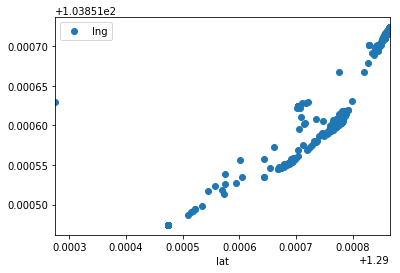

In [25]:
# Checking the distribtion of lat-long pairs for all data found on all Mondays 
img=df_Mon.plot(x='lat', y='lng', style='o')

In [9]:
#Implementing DBSCAN on all the above dataframes for clustering
from sklearn.cluster import DBSCAN

In [76]:
#Making a matrix out of the lat and long points to pass as input to the DBSCAN clustering algorithm
coordsMonday = df_Mon.as_matrix(columns=['lat', 'lng'])

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [77]:
coordsMonday

array([[  1.29069291, 103.8515545 ],
       [  1.29078033, 103.85160322],
       [  1.29078033, 103.85160322],
       ...,
       [  1.29086614, 103.85172392],
       [  1.29086614, 103.85172392],
       [  1.29086614, 103.85172392]])

In [51]:
#Scaling the plot for better visual representation
C_scaled = scaler.fit_transform(coords)

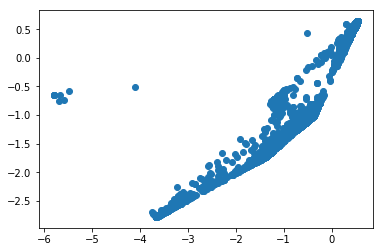

In [52]:
plt.scatter(C_scaled[:, 0], C_scaled[:, 1])

Text(0, 0.5, 'lng')

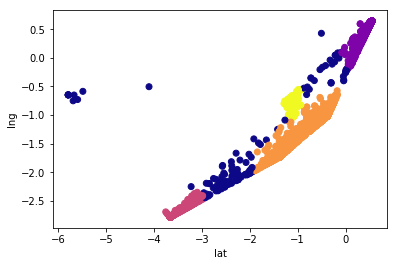

In [74]:
#These are the clusters as a result of DBSCAN algorithm
dbscan = DBSCAN(eps=0.2, min_samples = 80)
clusters = dbscan.fit_predict(C_scaled)
plt.scatter(C_scaled[:, 0], C_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 4


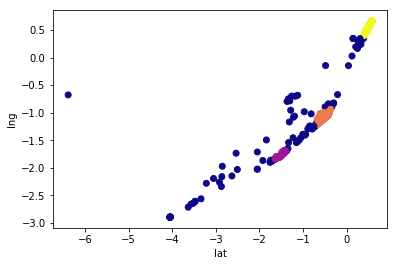

In [87]:
# Clustering implemented on all data points collected on all Mondays
df_Mon=df.loc[df['days']==0]
coordsMonday = df_Mon.as_matrix(columns=['lat', 'lng'])
Mon_scaled = scaler.fit_transform(coordsMonday)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(Mon_scaled)
plt.scatter(Mon_scaled[:, 0], Mon_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

In [34]:
#Calculating silhouette score of DBSCAN clustering
from sklearn.metrics import silhouette_score as ss
score = ss(df, clusters, metric='euclidean')
score

0.0054461143734115015

In [36]:
#Implementing K-Means Clustering to compare with DBSCAN clustering 
from sklearn.cluster import KMeans
clusterer = KMeans (n_clusters=7, init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=2,precompute_distances='auto', random_state=3192, copy_x=True, n_jobs=1, algorithm='auto')
clusterer.fit(df)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.433703589079276e-05
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.147655712090649e-05
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.0956418781853405e-05
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.075026301178224e-05
start iteration
done sorting
end inner loop
Iteration 4, inertia 4.06833368951561e-05
start iteration
done sorting
end inner loop
Iteration 5, inertia 4.067264462124722e-05
center shift 2.264156e-06 within tolerance 6.567644e-12
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 4.5211028599444296e-05
start iteration
done sorting
end inner loop
Iteration 1, inertia 4.3229331026782824e-05
start iteration
done sorting
end inner loop
Iteration 2, inertia 4.278024618219269e-05
start iteration
done sorting
end inner loop
Iteration 3, inertia 4.254878328471216e-05
start iteration
done sor

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=3192, tol=0.0001, verbose=2)

In [39]:
# Checking the silhouette score of K-Means for comparison with the silhouette score of DBSCAN Clustering
score_kmeans = ss(df,clusterer.labels_,metric='euclidean')
score_kmeans

0.5251208296345569

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 5


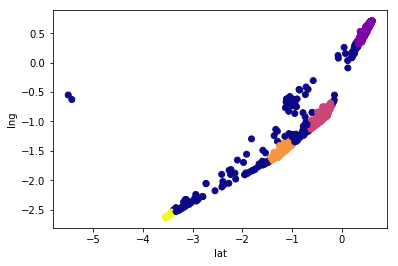

In [88]:
# Clustering implemented on all data points collected on all Tuesdays
df_Tue=df.loc[df['days']==1]
coordsTuesday = df_Tue.as_matrix(columns=['lat', 'lng'])
Tue_scaled = scaler.fit_transform(coordsTuesday)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(Tue_scaled)
plt.scatter(Tue_scaled[:, 0], Tue_scaled[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 4


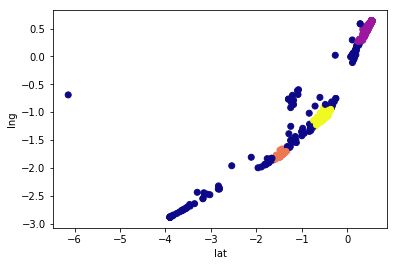

In [90]:
# Clustering implemented on all data points collected on all Wednesdays
df_Wed=df.loc[df['days']==2]
coordsWed = df_Wed.as_matrix(columns=['lat', 'lng'])
coordsWed = scaler.fit_transform(coordsWed)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(coordsWed)
plt.scatter(coordsWed[:, 0], coordsWed[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 2


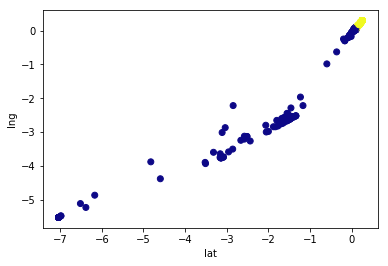

In [93]:
# Clustering implemented on all data points collected on all Thursdays
df_Thu=df.loc[df['days']==3]
coordsThu = df_Thu.as_matrix(columns=['lat', 'lng'])
coordsThu = scaler.fit_transform(coordsThu)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(coordsThu)
plt.scatter(coordsThu[:, 0], coordsThu[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 5


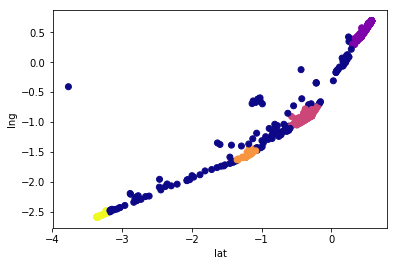

In [94]:
# Clustering implemented on all data points collected on all Fridays
df_Fri=df.loc[df['days']==4]
coordsFri = df_Fri.as_matrix(columns=['lat', 'lng'])
coordsFri = scaler.fit_transform(coordsFri)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(coordsFri)
plt.scatter(coordsFri[:, 0], coordsFri[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

Mon Cluster Size: 3


/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


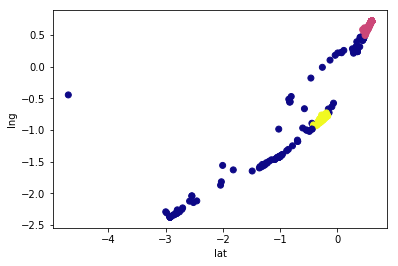

In [95]:
# Clustering implemented on all data points collected on all Saturdays
df_Sat=df.loc[df['days']==5]
coordsSat = df_Sat.as_matrix(columns=['lat', 'lng'])
coordsSat = scaler.fit_transform(coordsSat)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(coordsSat)
plt.scatter(coordsSat[:, 0], coordsSat[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))

/home/opc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Mon Cluster Size: 5


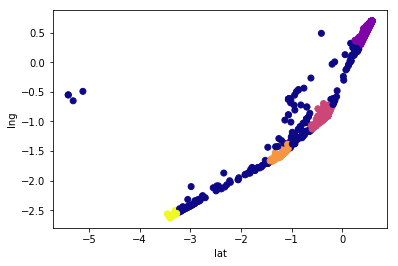

In [97]:
# Clustering implemented on all data points collected on all Sundays
df_Sun=df.loc[df['days']==6]
coordsSun = df_Sun.as_matrix(columns=['lat', 'lng'])
coordsSun = scaler.fit_transform(coordsSun)
dbscan = DBSCAN(eps=0.1, min_samples = 40)
clusters = dbscan.fit_predict(coordsSun)
plt.scatter(coordsSun[:, 0], coordsSun[:, 1], c=clusters, cmap="plasma")
plt.xlabel("lat")
plt.ylabel("lng")
print('Mon Cluster Size:',len(set(dbscan.labels_)))